<center>
<h1><b>Lab 4</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>September 24, 2020</b></h3>
</center>

### Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from functools import partial

from scipy.integrate import solve_ivp

In [2]:
_l = _g = 9.81   # Pendulum length / gravity
_q = 0.5        # Damping coefficient
_A = 1.2        # Driving 'force' amplitude
_wd = 2 / 3     # driving angular frequency [rad/s]
_phi = 0        # Poincare Phase
_N = 10000      # Poincare Section Sample Size
_theta0  = 0.2  # initial angle wrt to vertical [rad]
_dtheta0  = 0   # initial angular velocity [rad/s]

### Support Functions

In [3]:
def df_nonlinear_pendulum(t, x, dx, zeta, w0, A, wd):
    return -2 * zeta * w0 * dx - w0 ** 2 * np.sin(x) + A * np.sin(wd * t)

## Custom dsolve function using Euler-Cromer
def dsolve(f, t, y0, dy0):
    t = np.asarray(t)
    y0 = np.asarray(y0)

    y = np.zeros((np.size(t), np.size(y0)))
    dy = np.zeros((np.size(t), np.size(dy0)))
    y[0] = y0
    dy[0] = dy0

    for i in range(np.size(t)-1):    
        dy[i+1] = dy[i] + f(t[i], y[i], dy[i]) * (t[i + 1] - t[i])
        y[i+1] = y[i] + dy[i + 1] * (t[i + 1] - t[i])
    return y, dy

In [4]:
def create_poincare(N=_N, state0=(_theta0, _dtheta0), phi=_phi, l=_l, g=_g, q=_q, A=_A, wd=_wd):
    theta0, dtheta0 = state0
    w0 = np.sqrt(g/l)
    zeta = q / (2 * w0)
    tau_d = 2 * np.pi / wd  # Driving period

    t_i = 0
    t_f = tau_d * N

    df = lambda t, y : [y[1], -2 * zeta * w0 * y[1] - w0 ** 2 * np.sin(y[0]) + A * np.sin(wd * t)]
    sol = solve_ivp(df, [t_i, t_f + phi], [theta0, dtheta0], t_eval=np.arange(phi, t_f + phi, tau_d))

    t = sol.t
    theta, omega = sol.y
    theta = np.mod(theta + np.pi, 2 * np.pi) - np.pi  # Constrain theta to [-pi, pi]

    m = I = 1
    energy = m * g * l * (1-np.cos(theta)) + 0.5 * m * l ** 2 * omega ** 2
    return t, theta, omega, energy

In [5]:
t, theta, omega, energy = create_poincare()

# w0 = np.sqrt(g/l)
# zeta = q / (2 * w0)
# tau_d = 2 * np.pi / wd  # Driving period
# t_i = 0
# t_f = tau_d * N

In [6]:
# df = lambda t, y : [y[1], -2 * zeta * w0 * y[1] - w0 ** 2 * np.sin(y[0]) + A * np.sin(wd * t)]
# sol = solve_ivp(df_, [t_i, t_f + phi], [theta0, dtheta0], t_eval=np.arange(phi, t_f + phi, tau_d))

# t = sol.t
# theta, omega = sol.y
# theta = np.mod(theta + np.pi, 2 * np.pi) - np.pi  # Constrain theta to [-pi, pi]

# m = I = 1
# energy = m * g * l * (1-np.cos(theta)) + 0.5 * m * l ** 2 * omega ** 2

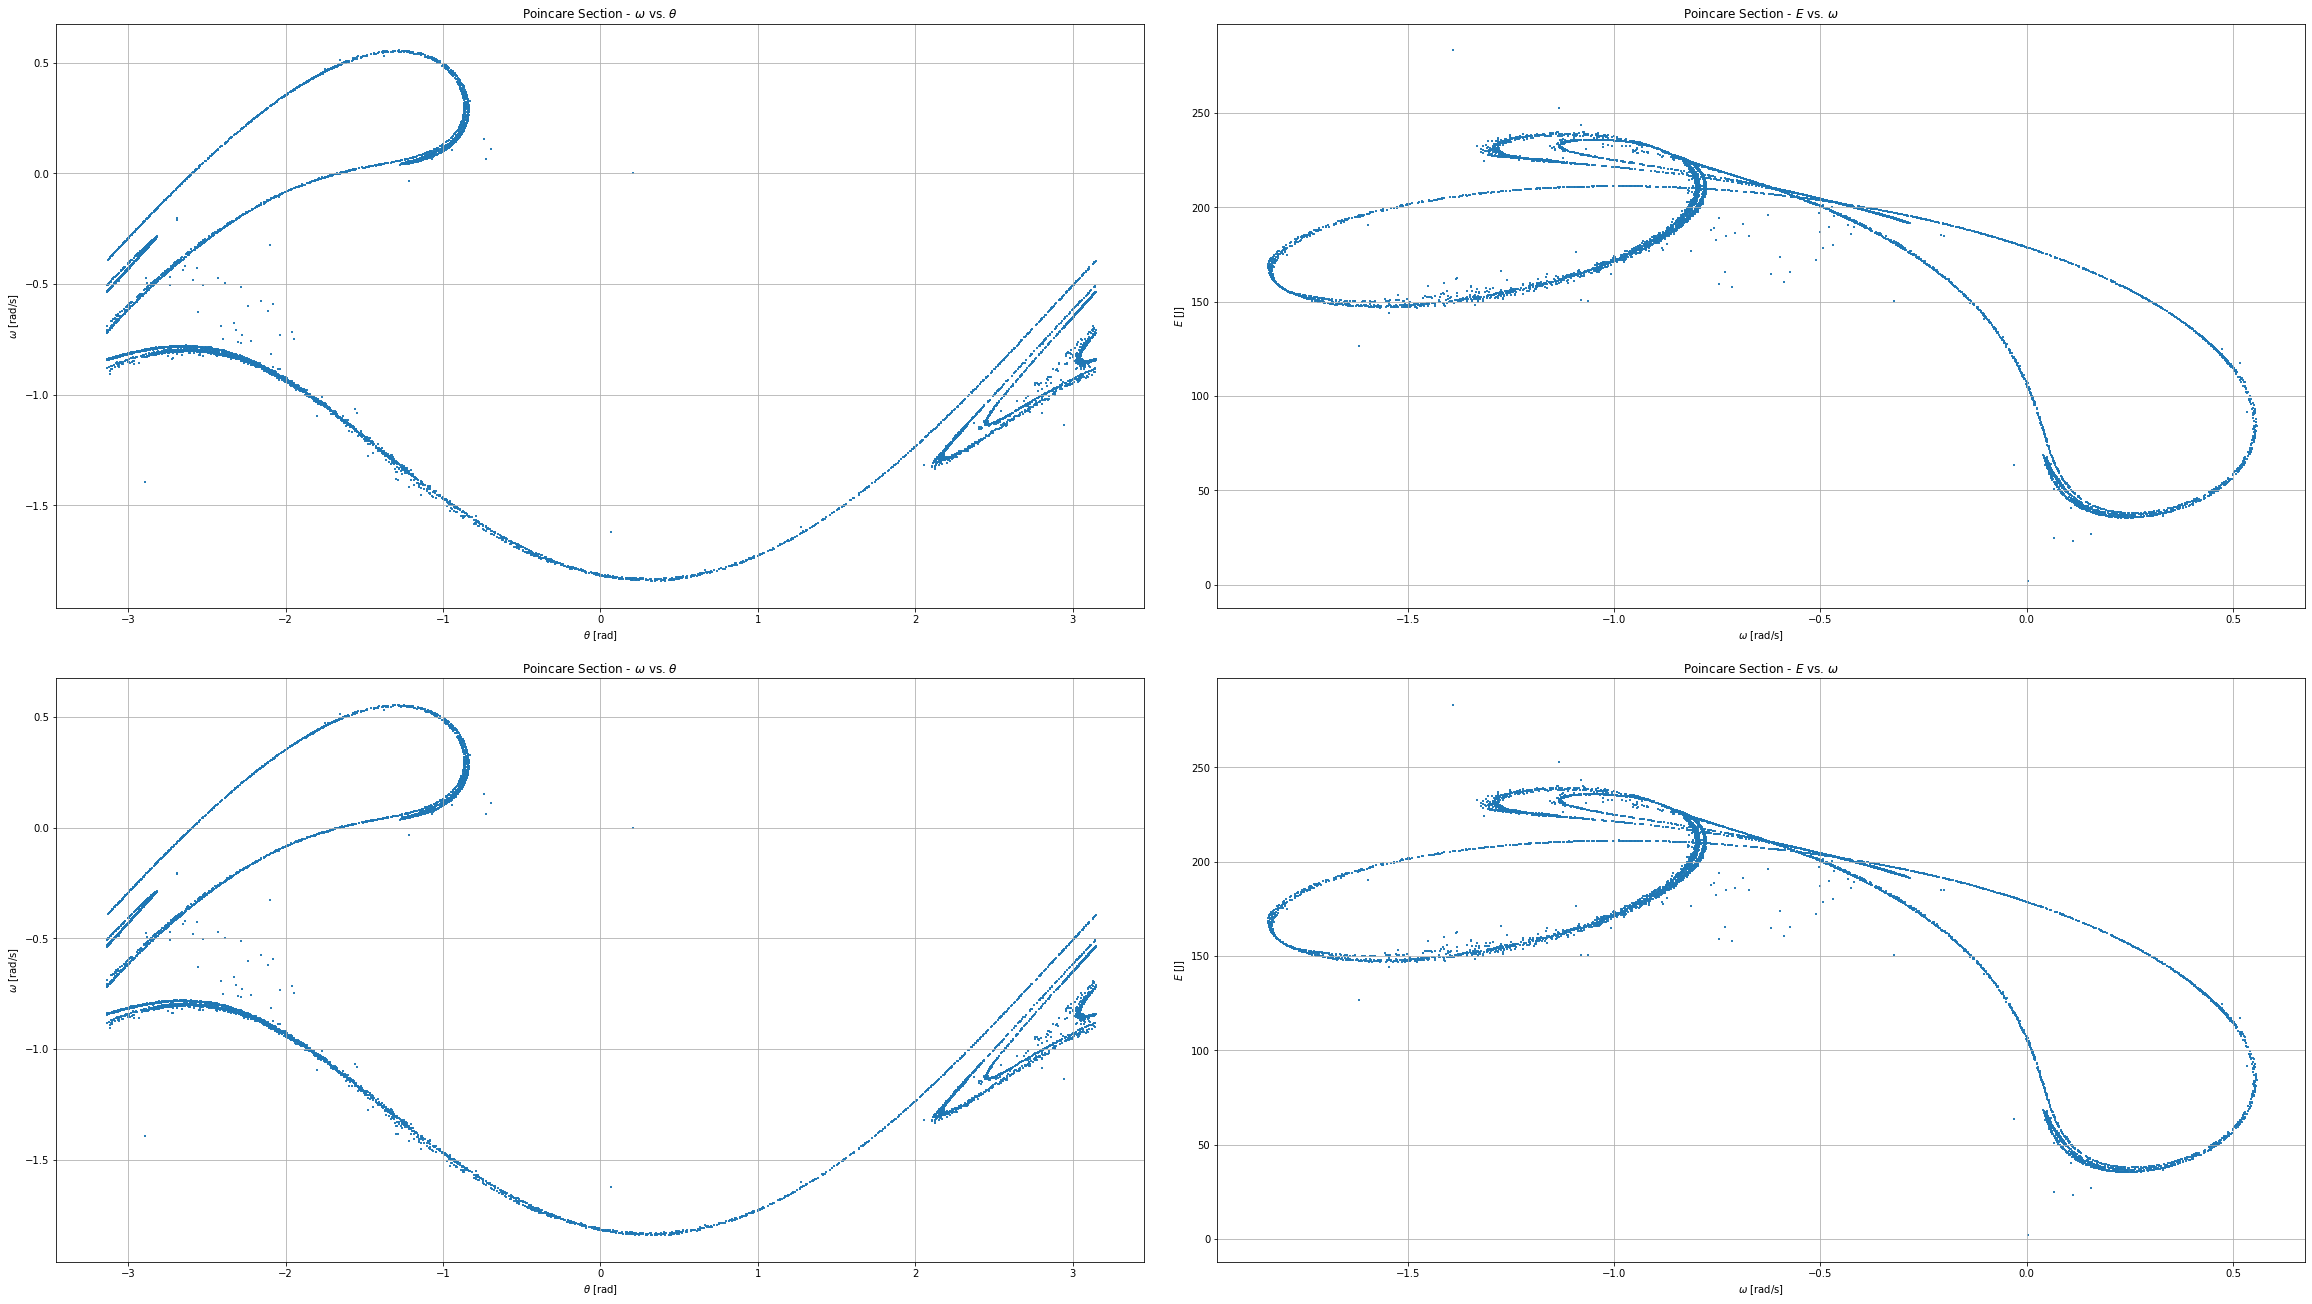

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(32,18), constrained_layout=True)

ax[0,0].scatter(theta, omega, s = 1, marker=',')
ax[0,0].set_title(r'Poincare Section - $\omega$ vs. $\theta$')
ax[0,0].set_xlabel(r"$\theta$ [rad]")
ax[0,0].set_ylabel(r"$\omega$ [rad/s]")
ax[0,0].grid()
ax[0,1].scatter(omega, energy, s = 1, marker=',')
ax[0,1].set_title(r'Poincare Section - $E$ vs. $\omega$')
ax[0,1].set_xlabel(r"$\omega$ [rad/s]")
ax[0,1].set_ylabel(r"$E$ [J]")
ax[0,1].grid()

ax[1,0].scatter(theta, omega, s = 1, marker=',')
ax[1,0].set_title(r'Poincare Section - $\omega$ vs. $\theta$')
ax[1,0].set_xlabel(r"$\theta$ [rad]")
ax[1,0].set_ylabel(r"$\omega$ [rad/s]")
ax[1,0].grid()
ax[1,1].scatter(omega, energy, s = 1, marker=',')
ax[1,1].set_title(r'Poincare Section - $E$ vs. $\omega$')
ax[1,1].set_xlabel(r"$\omega$ [rad/s]")
ax[1,1].set_ylabel(r"$E$ [J]")
ax[1,1].grid()

plt.savefig('poincare_sections.png', dpi=600)
# plt.show()

In [8]:
# t = np.linspace(t_i, tau_d * N, n * N)
# dt = (t_f - t_i) / (n * N)
# i_phi = round(phi / dt)  # Index of phi


# df = partial(df_nonlinear_pendulum, zeta=zeta, w0=w0, A=A, wd=wd)
# theta, omega = dsolve(df, t, theta0, dtheta0)
# energy  = m*g*l * (1.0 - np.cos(theta)) + 0.5 * omega ** 2








# pointarea = 2.
# fig, axArray = plt.subplots(2, 2, figsize=(16,16), constrained_layout=True)
# ((ax0, ax1), (ax2, ax3)) = axArray

# ax0.scatter(theta[i_phi:n:], omega[i_phi:n:], s = pointarea, label = "phase space")
# ax0.set_xlabel("theta [rad]")
# ax0.set_ylabel("omega [rad/s]")

# ax1.plot(t[i_phi:n:], omega[i_phi:n:], label = "omega")
# ax1.set_xlabel("t[s]")
# ax1.set_ylabel("omega[rad/s]")

# ax2.plot(t[i_phi:n:], theta[i_phi:n:], label = "theta")
# ax2.set_xlabel("t[s]")
# ax2.set_ylabel("theta[rad]")

# ax3.plot(t[i_phi:n:], energy[i_phi:n:], label = "energy")
# ax3.set_xlabel("t[s]")
# ax3.set_ylabel("energy [a.u.]")

# plt.show()